In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [8]:
train_dataset = image_dataset_from_directory('drive/MyDrive/lisa2/training/',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=128,
                                             image_size=(128, 128))

Found 1652 files belonging to 2 classes.
Using 1487 files for training.


In [9]:
validation_dataset = image_dataset_from_directory('drive/MyDrive/lisa2/validation/',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=128,
                                             image_size=(128, 128))

Found 1652 files belonging to 2 classes.
Using 165 files for validation.


In [ ]:
class_names = train_dataset.class_names
class_names

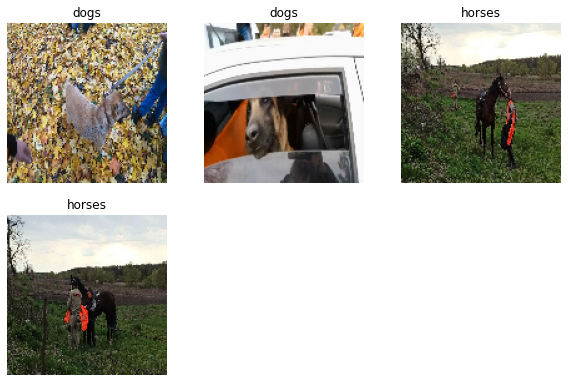

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(4):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
test_dataset = image_dataset_from_directory('drive/MyDrive/lisa2/testing/',
                                             shuffle=True,
                                             label_mode='int',
                                             batch_size=128,
                                             image_size=(128, 128))

Found 30 files belonging to 2 classes.


In [ ]:
test_dataset.class_names

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [14]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(128, 128, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [15]:
vgg16_net.trainable = False

In [16]:
model = Sequential()
model.add(Normalization())
# Добавляем модель VGG16 в сеть как слой
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [36]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=12)

Epoch 1/15
12/12 [==============================] - 377s 29s/step - loss: 4.4412 - accuracy: 0.9032 - val_loss: 0.1844 - val_accuracy: 0.9939
Epoch 2/15
12/12 [==============================] - 325s 24s/step - loss: 0.4467 - accuracy: 0.9939 - val_loss: 0.4297 - val_accuracy: 0.9939
Epoch 3/15
12/12 [==============================] - 327s 24s/step - loss: 0.2250 - accuracy: 0.9953 - val_loss: 1.7500 - val_accuracy: 0.9939
Epoch 4/15
12/12 [==============================] - 324s 24s/step - loss: 0.2147 - accuracy: 0.9973 - val_loss: 1.8674 - val_accuracy: 0.9939
Epoch 5/15
12/12 [==============================] - 325s 24s/step - loss: 0.1822 - accuracy: 0.9980 - val_loss: 1.5907 - val_accuracy: 0.9939
Epoch 6/15
12/12 [==============================] - 324s 24s/step - loss: 0.0301 - accuracy: 0.9987 - val_loss: 1.5945 - val_accuracy: 0.9939
Epoch 7/15
12/12 [==============================] - 324s 24s/step - loss: 0.2135 - accuracy: 0.9980 - val_loss: 1.8143 - val_accuracy: 0.9939
Epoch 

In [26]:
scores = model.evaluate(test_dataset, verbose=1)

1/1 [==============================] - 6s 6s/step - loss: 30.3931 - accuracy: 0.4333


In [27]:
print("Процент верных ответов на тестовых данных:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 43.3333


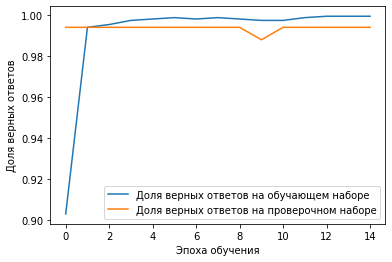

In [42]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [43]:
model.save("lisa_model.h5")

In [44]:
!ls

'1Ri9btT_T8aOv_H-3Ayo2gairU5G0bDZA?usp=sharing'   intel_image_model.h5
'1W_DrHUlX2S-X5wUMkpUhrGnVFO2IKlY3?usp=sharing'   sample_data
 drive						  train_data.npy


In [45]:
files.download("lisa_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow import keras
model = keras.models.load_model(files.upload())

Saving intel_image_model.h5 to intel_image_model.h5


In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(30):
    prediction = model.predict(test_dataset)[0][0]
    pred_label = 'dog' if prediction < 0.5 else 'horse'
    ax = plt.subplot(10, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f'{pred_label} {prediction}')
    plt.axis("off")